### The following code was used to plot gridded netCDF datasets of wildfire smoke PM2.5 and also map counties to give perspective
#### Author: Olivia Sablan (osablan@colostate.edu)

In [1]:
# import necessary packages
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib as mplt
import xarray
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.colors as colors
import cmasher as cmr
import netCDF4
import h5netcdf
from matplotlib import rcParams
from matplotlib import rc
import cartopy.io.shapereader as shpreader
rc('mathtext', default='regular') 
rcParams['font.family'] = 'serif'
rcParams['mathtext.fontset'] = 'cm'
rcParams['mathtext.rm'] = 'serif'
rcParams['font.size'] = 12

# Read in the county shapefiles from the US Census Bureau's Tiger/Line files with geopandas
reader = shpreader.Reader('C:/Users/olivia.sablan/OneDrive - State of New Mexico/Documents/Data/tl_2023_us_county/tl_2023_us_county.shp')
# pull the geometries of the polygons out of the shapefiles
counties = list(reader.geometries())
# convert counties to the PlateCarree projection for mapping
COUNTIES = cfeature.ShapelyFeature(counties, ccrs.PlateCarree())

In [4]:
smokenm = xarray.open_dataset('../Data/smoke/KateGridded/NM_griddedPM_all-final_2022.nc')

In [5]:
HMS = smokenm['HMS_smokedays']
smokePM = smokenm['smokepm']
totalPM = smokenm['totalpm']
glat = smokenm['lat']
glon = smokenm['lon']
warmHMS = np.sum(HMS[91:243,:,:],axis=0)
warmsmoke = np.mean(smokePM[91:243,:,:],axis=0)
warmtotalpm = np.mean(totalPM[91:243,:,:],axis=0)

C:\Users\olivia.sablan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\cartopy\mpl\style.py:76: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '
C:\Users\olivia.sablan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\cartopy\mpl\style.py:76: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '
C:\Users\olivia.sablan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\cartopy\mpl\style.py:76: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '
C:\Users\olivia.sablan\AppData\Local\Packages\PythonSoftwa

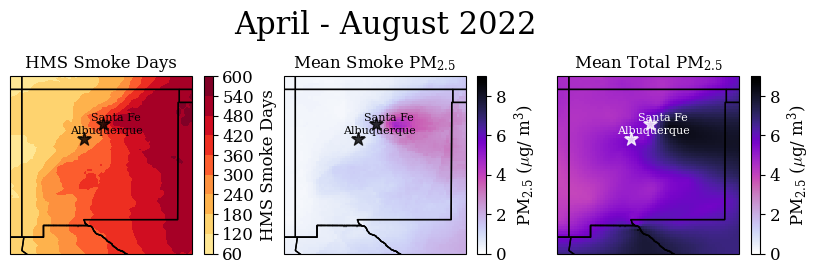

In [4]:
fig = plt.figure(figsize=(10,10))
map_bounds = [-109.5, -102.5, 30.7, 37.5]
plt.suptitle('April - August 2022', fontsize=22, color = 'k', y=.65)
ax1 = fig.add_subplot(1, 3, 1, projection = ccrs.PlateCarree())
ax1.set_extent(map_bounds, ccrs.PlateCarree())
ax1.add_feature(cfeature.OCEAN,  color = 'xkcd:light blue', zorder = 10)
ax1.add_feature(cfeature.COASTLINE)
ax1.add_feature(cfeature.BORDERS, color = 'k')
ax1.add_feature(cfeature.STATES, zorder = 10)
ax1.set_title('HMS Smoke Days',   fontsize = 12)
ax1.scatter(-106.6504, 35.0844, color = 'k', s= 100, marker ="*", zorder = 15, alpha = 0.8)
ax1.annotate("Albuquerque", (-107.2, 35.3), fontsize = 8, zorder = 20);
ax1.scatter(-105.9378, 35.6870, color = 'k', s = 100, marker ="*", zorder = 15, alpha = 0.8)
ax1.annotate("Santa Fe", (-106.4, 35.8), fontsize = 8, zorder = 20);
cs1 = ax1.contourf(glon, glat, warmHMS, cmap = 'YlOrRd', vmin = 0, vmax = 555)
cax1,kw1 = mplt.colorbar.make_axes(ax1,location='right',pad=0.05,shrink=0.23)
cbar1 = fig.colorbar(cs1,cax=cax1,**kw1)
cbar1.set_label('HMS Smoke Days', fontsize=12)

ax2 = fig.add_subplot(1, 3, 2, projection = ccrs.PlateCarree())
ax2.set_extent(map_bounds, ccrs.PlateCarree())
ax2.add_feature(cfeature.OCEAN,  color = 'xkcd:light blue', zorder = 10)
ax2.add_feature(cfeature.COASTLINE)
ax2.add_feature(cfeature.BORDERS, color = 'k')
ax2.add_feature(cfeature.STATES, zorder = 10)
ax2.set_title('Mean Smoke PM$_{2.5}$',   fontsize = 12)
ax2.scatter(-106.6504, 35.0844, color = 'k', s= 100, marker ="*", zorder = 15, alpha = 0.8)
ax2.annotate("Albuquerque", (-107.2, 35.3), fontsize = 8, zorder = 20);
ax2.scatter(-105.9378, 35.6870, color = 'k', s = 100, marker ="*", zorder = 15, alpha = 0.8)
ax2.annotate("Santa Fe", (-106.4, 35.8), fontsize = 8, zorder = 20);
cs2 = ax2.pcolormesh(glon, glat, warmsmoke, cmap = cmr.gothic_r, vmin = 0, vmax = 9)
cax2,kw2 = mplt.colorbar.make_axes(ax2,location='right',pad=0.05,shrink=0.23)
cbar2 = fig.colorbar(cs2,cax=cax2,**kw2)
cbar2.set_label('PM$_{2.5}$ ($\mathrm{\mu}$g/ m$^{3}$)', fontsize=12)

ax3 = fig.add_subplot(1, 3, 3, projection = ccrs.PlateCarree())
ax3.set_extent(map_bounds, ccrs.PlateCarree())
ax3.add_feature(cfeature.OCEAN,  color = 'xkcd:light blue', zorder = 10)
ax3.add_feature(cfeature.COASTLINE)
ax3.add_feature(cfeature.BORDERS, color = 'k')
ax3.add_feature(cfeature.STATES, zorder = 10)
ax3.set_title('Mean Total PM$_{2.5}$',   fontsize = 12)
ax3.scatter(-106.6504, 35.0844, color = 'white', s= 100, marker ="*", zorder = 15, alpha = 0.8)
ax3.annotate("Albuquerque", (-107.2, 35.3), fontsize = 8, zorder = 20, color = 'white');
ax3.scatter(-105.9378, 35.6870, color = 'white', s = 100, marker ="*", zorder = 15, alpha = 0.8)
ax3.annotate("Santa Fe", (-106.4, 35.8), fontsize = 8, zorder = 20, color = 'white');
cs3 = ax3.pcolormesh(glon, glat, warmtotalpm, cmap = cmr.gothic_r, vmin = 0, vmax = 9)
cax3,kw3 = mplt.colorbar.make_axes(ax3,location='right',pad=0.05,shrink=0.23)
cbar3 = fig.colorbar(cs3,cax=cax3,**kw3)
cbar3.set_label('PM$_{2.5}$ ($\mathrm{\mu}$g/ m$^{3}$)', fontsize=12)

In [5]:
df22 = xarray.open_dataset('../Data/smoke/KateGridded/NM_griddedPM_all-final_2022.nc')
df21 = xarray.open_dataset('../Data/smoke/KateGridded/krigedPM25_2021_4repo.nc')
df20 = xarray.open_dataset('../Data/smoke/KateGridded/krigedPM25_2020_4repo.nc')
df19 = xarray.open_dataset('../Data/smoke/KateGridded/krigedPM25_2019_4repo.nc')
df18 = xarray.open_dataset('../Data/smoke/KateGridded/krigedPM25_2018_v2.nc')
df17 = xarray.open_dataset('../Data/smoke/KateGridded/krigedPM25_2017_v2.nc')
df16 = xarray.open_dataset('../Data/smoke/KateGridded/krigedPM25_2016_v2.nc')


lat = df21['lat']
lon = df21['lon']

In [6]:
smoke22 = df22['smokepm']
totalPM22 = df22['totalpm']
warmsmoke22 = np.mean(smoke22[91:243,:,:],axis=0)
warmtotalpm22 = np.mean(totalPM22[0:365,:,:],axis=0)

smoke21 = df21['PM25'] - df21['Background_PM25']
totalPM21 = df21['PM25']
warmsmoke21 = np.mean(smoke21[91:243,:,:],axis=0)
warmtotalpm21 = np.mean(totalPM21[0:365,:,:],axis=0)

smoke20 = df20['PM25'] - df20['Background_PM25']
totalPM20 = df20['PM25']
warmsmoke20 = np.mean(smoke20[91:243,:,:],axis=0)
warmtotalpm20 = np.mean(totalPM20[0:365,:,:],axis=0)

smoke19 = df19['PM25'] - df19['Background_PM25']
totalPM19 = df19['PM25']
warmsmoke19 = np.mean(smoke19[91:243,:,:],axis=0)
warmtotalpm19 = np.mean(totalPM19[0:365,:,:],axis=0)

smoke18 = df18['PM25'] - df18['Background_PM25']
totalPM18 = df18['PM25']
warmsmoke18 = np.mean(smoke18[91:243,:,:],axis=0)
warmtotalpm18 = np.mean(totalPM18[0:365,:,:],axis=0)

smoke17 = df17['PM25'] - df17['Background_PM25']
totalPM17 = df17['PM25']
warmsmoke17 = np.mean(smoke17[91:243,:,:],axis=0)
warmtotalpm17 = np.mean(totalPM17[0:365,:,:],axis=0)

smoke16 = df16['PM25'] - df16['Background_PM25']
totalPM16 = df16['PM25']
warmsmoke16 = np.mean(smoke16[91:243,:,:],axis=0)
warmtotalpm16 = np.mean(totalPM16[0:365,:,:],axis=0)

C:\Users\olivia.sablan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\cartopy\mpl\style.py:76: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '
C:\Users\olivia.sablan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\cartopy\mpl\style.py:76: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '
C:\Users\olivia.sablan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\cartopy\mpl\style.py:76: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '
C:\Users\olivia.sablan\AppData\Local\Packages\PythonSoftwa

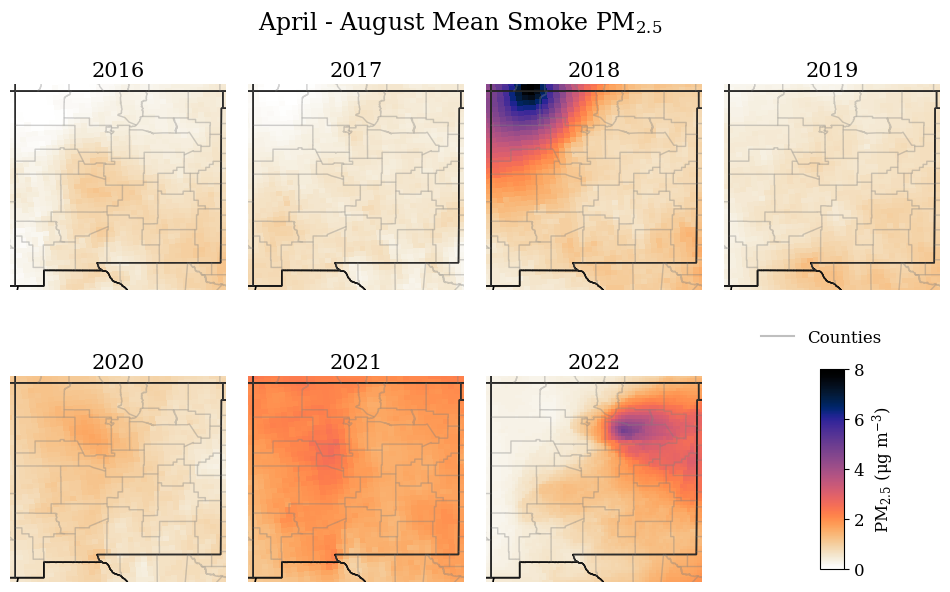

In [7]:
years = ['2016', '2017', '2018', '2019', '2020', '2021', '2022', '']
fig, axs = plt.subplots(ncols=4,nrows=2, subplot_kw={'projection': ccrs.PlateCarree()}, figsize=(12,8),
                        gridspec_kw = {'wspace':.1, 'hspace':-.1})
norm = colors.Normalize(vmin = 0, vmax= 8)
cbar = plt.cm.ScalarMappable(norm=norm, cmap=cmr.torch_r)
axs=axs.flatten()
#fig.patch.set_visible(False)
plt.suptitle('April - August Mean Smoke PM$_{2.5}$', fontsize = 17, y = .9)
for i in range(0,8):
        #axs[i].set_extent([-120, -80, 31, 45], ccrs.PlateCarree())
        axs[i].set_extent([-109.2, -102.9, 31.2, 37.2], ccrs.PlateCarree())
        if (i == 0):
            cs =axs[i].pcolormesh(lon, lat, warmsmoke16, cmap = cmr.torch_r, vmin = 0, vmax = 8)
        elif (i == 1):
            axs[i].pcolormesh(lon, lat, warmsmoke17, cmap = cmr.torch_r, vmin = 0, vmax = 8)
        elif (i == 2):
            axs[i].pcolormesh(lon, lat, warmsmoke18, cmap = cmr.torch_r, vmin = 0, vmax = 8)
        elif (i == 3):
            axs[i].pcolormesh(lon, lat, warmsmoke19, cmap = cmr.torch_r, vmin = 0, vmax = 8)
        elif (i == 4):
            axs[i].pcolormesh(lon, lat, warmsmoke20, cmap = cmr.torch_r, vmin = 0, vmax = 8)
        elif (i == 5):
            axs[i].pcolormesh(lon, lat, warmsmoke21, cmap = cmr.torch_r, vmin = 0, vmax = 8)
        elif (i == 6):
            axs[i].pcolormesh(glon, glat, warmsmoke22, cmap = cmr.torch_r, vmin = 0, vmax = 8)
        elif (i == 7):
            plt.plot([], [])
            cb_ax = fig.add_axes([.8,.2,.02,.25])
            ax_cbar = fig.colorbar(cbar, ax=axs[i], shrink = .8, cax = cb_ax, orientation = 'vertical')
            ax_cbar.set_label('PM$_{2.5}$ ($\mu$g m$^{-3}$)', fontsize = 12)
            axs[i].plot([], [], color = 'gray', alpha = 0.5, label = 'Counties')
            axs[i].legend(bbox_to_anchor = [.8,1.3], fontsize = 12, frameon = False)
        if (i == 0) |(i == 1) | (i == 2) |(i == 3) | (i == 4) | (i == 5) | (i == 6):
#             axs[i].scatter(-106.6504, 35.0844, color = 'k', s= 100, marker ="*", zorder = 15, alpha = 0.8)
#             axs[i].annotate("Albuquerque", (-107.2, 35.3), fontsize = 8, zorder = 20);
#             axs[i].scatter(-105.9378, 35.6870, color = 'k', s = 100, marker ="*", zorder = 15, alpha = 0.8)
#             axs[i].annotate("Santa Fe", (-106.4, 35.8), fontsize = 8, zorder = 20);
            axs[i].add_feature(cfeature.COASTLINE)
            axs[i].add_feature(cfeature.BORDERS, color = 'k')
            axs[i].add_feature(cfeature.STATES)
            axs[i].add_feature(COUNTIES, facecolor = 'none', edgecolor = 'gray', alpha =0.2)
        axs[i].axis('off')
        axs[i].set_title(years[i], fontsize = 15)
fig.savefig('../Figures/smokegrid.png', dpi = 200, bbox_inches = 'tight')

C:\Users\olivia.sablan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\cartopy\mpl\style.py:76: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '
C:\Users\olivia.sablan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\cartopy\mpl\style.py:76: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '
C:\Users\olivia.sablan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\cartopy\mpl\style.py:76: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '
C:\Users\olivia.sablan\AppData\Local\Packages\PythonSoftwa

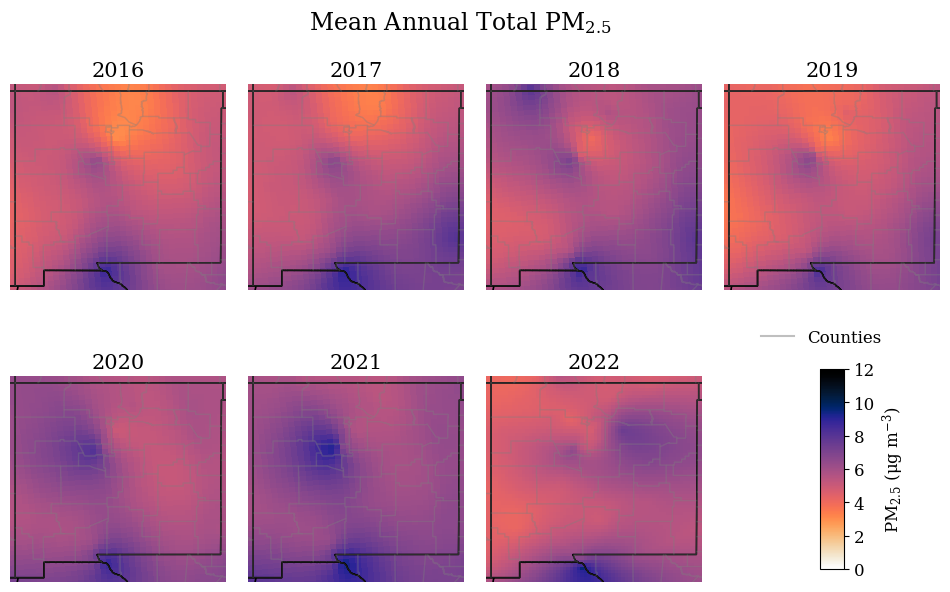

In [8]:
years = ['2016', '2017', '2018', '2019', '2020', '2021', '2022', '']
fig, axs = plt.subplots(ncols=4,nrows=2, subplot_kw={'projection': ccrs.PlateCarree()}, figsize=(12,8),
                        gridspec_kw = {'wspace':.1, 'hspace':-.1})
norm = colors.Normalize(vmin = 0, vmax= 12)
cbar = plt.cm.ScalarMappable(norm=norm, cmap=cmr.torch_r)
axs=axs.flatten()
#fig.patch.set_visible(False)
plt.suptitle('Mean Annual Total PM$_{2.5}$', fontsize = 17, y = .9)
for i in range(0,8):
        #axs[i].set_extent([-120, -80, 31, 45], ccrs.PlateCarree())
        axs[i].set_extent([-109.2, -102.9, 31.2, 37.2], ccrs.PlateCarree())
        if (i == 0):
            cs =axs[i].pcolormesh(lon, lat, warmtotalpm16, cmap = cmr.torch_r, vmin = 0, vmax = 12)
        elif (i == 1):
            axs[i].pcolormesh(lon, lat, warmtotalpm17, cmap = cmr.torch_r, vmin = 0, vmax = 12)
        elif (i == 2):
            axs[i].pcolormesh(lon, lat, warmtotalpm18, cmap = cmr.torch_r, vmin = 0, vmax = 12)
        elif (i == 3):
            axs[i].pcolormesh(lon, lat, warmtotalpm19, cmap = cmr.torch_r, vmin = 0, vmax = 12)
        elif (i == 4):
            axs[i].pcolormesh(lon, lat, warmtotalpm20, cmap = cmr.torch_r, vmin = 0, vmax = 12)
        elif (i == 5):
            axs[i].pcolormesh(lon, lat, warmtotalpm21, cmap = cmr.torch_r, vmin = 0, vmax = 12)
        elif (i == 6):
            axs[i].pcolormesh(glon, glat, warmtotalpm22, cmap = cmr.torch_r, vmin = 0, vmax = 12)
        elif (i == 7):
            plt.plot([], [])
            cb_ax = fig.add_axes([.8,.2,.02,.25])
            ax_cbar = fig.colorbar(cbar, ax=axs[i], shrink = .8, cax = cb_ax, orientation = 'vertical')
            ax_cbar.set_label('PM$_{2.5}$ ($\mu$g m$^{-3}$)', fontsize = 12)
            axs[i].plot([], [], color = 'gray', alpha = 0.5, label = 'Counties')
            axs[i].legend(bbox_to_anchor = [.8,1.3], fontsize = 12, frameon = False)
        if (i == 0) |(i == 1) | (i == 2) |(i == 3) | (i == 4) | (i == 5) | (i == 6):
#             axs[i].scatter(-106.6504, 35.0844, color = 'k', s= 100, marker ="*", zorder = 15, alpha = 0.8)
#             axs[i].annotate("Albuquerque", (-107.2, 35.3), fontsize = 8, zorder = 20);
#             axs[i].scatter(-105.9378, 35.6870, color = 'k', s = 100, marker ="*", zorder = 15, alpha = 0.8)
#             axs[i].annotate("Santa Fe", (-106.4, 35.8), fontsize = 8, zorder = 20);
            axs[i].add_feature(cfeature.COASTLINE)
            axs[i].add_feature(cfeature.BORDERS, color = 'k')
            axs[i].add_feature(cfeature.STATES)
            axs[i].add_feature(COUNTIES, facecolor = 'none', edgecolor = 'gray', alpha =0.2)
        axs[i].axis('off')
        axs[i].set_title(years[i], fontsize = 15)
fig.savefig('../Figures/totalpmgrid.png', dpi = 200, bbox_inches = 'tight')